# Instructor Do: Random Forests

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
file_path = Path("Resources/loans_data_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()

,amount,term,age,bad,month_num,gender_female,gender_male,education_Bachelor,education_High School or Below,education_Master or Above,education_college
0,1000,30,45,0,6,0,1,0,1,0,0
1,1000,30,50,0,7,1,0,1,0,0,0
2,1000,30,33,0,8,1,0,1,0,0,0
3,1000,15,27,0,9,0,1,0,0,0,1
4,1000,30,28,0,10,1,0,0,0,0,1


In [3]:
# Define features set
X = df_loans.copy()
X.drop("bad", axis=1, inplace=True)
X.head()

,amount,term,age,month_num,gender_female,gender_male,education_Bachelor,education_High School or Below,education_Master or Above,education_college
0,1000,30,45,6,0,1,0,1,0,0
1,1000,30,50,7,1,0,1,0,0,0
2,1000,30,33,8,1,0,1,0,0,0
3,1000,15,27,9,0,1,0,0,0,1
4,1000,30,28,10,1,0,0,0,0,1


In [4]:
# Define target vector
y = df_loans["bad"].ravel()
y[:5]

array([0, 0, 0, 0, 0])

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [7]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [8]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [9]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [10]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [11]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

## Model Evaluation

In [12]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,50,34
Actual 1,26,15


Accuracy Score : 0.52
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.60      0.62        84
           1       0.31      0.37      0.33        41

    accuracy                           0.52       125
   macro avg       0.48      0.48      0.48       125
weighted avg       0.54      0.52      0.53       125



## Feature Importance

In [14]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [15]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.4266459912521756, 'age'),
 (0.32585738752425747, 'month_num'),
 (0.08401305615771759, 'term'),
 (0.05556508397551085, 'amount'),
 (0.023338565688862944, 'education_college'),
 (0.02311242644187058, 'education_High School or Below'),
 (0.020187539664597538, 'gender_male'),
 (0.01937105982976139, 'education_Bachelor'),
 (0.019325604910119445, 'gender_female'),
 (0.0025832845551266455, 'education_Master or Above')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

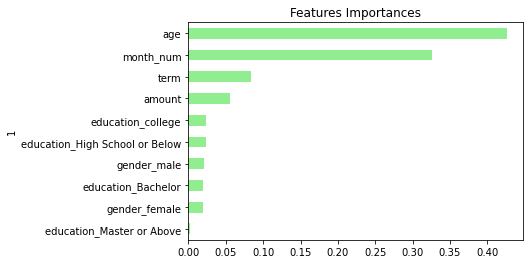

In [16]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False)